In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [82]:
df=pd.read_csv(r"C:\Users\MY BOOK\Downloads\Mall_Customers.csv")

In [83]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
df=df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Univariate Analysis

In [87]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [88]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

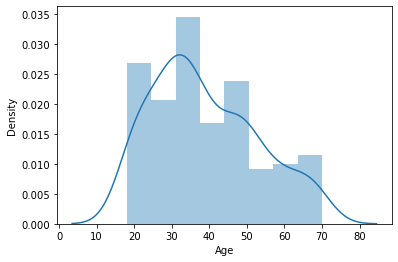

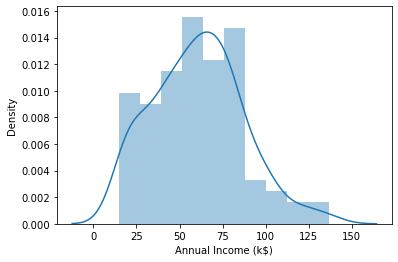

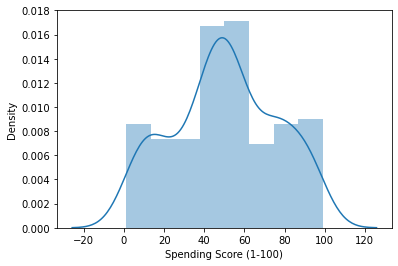

In [90]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for f in columns:
    plt.figure()
    sns.distplot(df[f], kde=True)

In [ ]:
# Observe that 'Age' and 'Annual income' follow a slightly right skewed distribution.
# 'Spending score' surprisingle follows  multimodal distribution.

In [91]:
df['Gender'].value_counts(normalize=True)

# According to the given data, 56 percent of the visitors are females. 

Female    0.56
Male      0.44
Name: Gender, dtype: float64

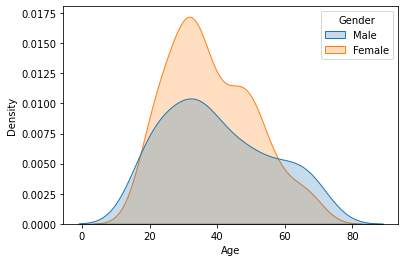

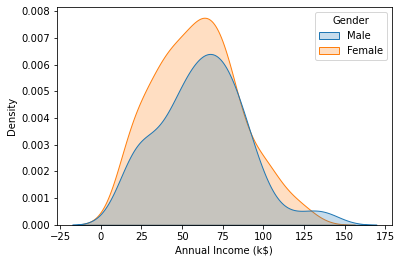

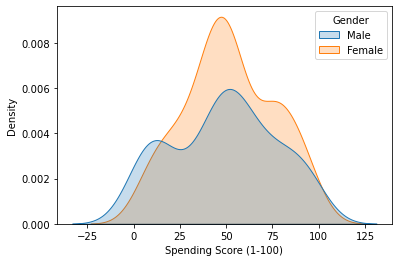

In [17]:
# Now lets investigate how the variables 'Age', 'Annual Income (k$)' and 'Spending Score (1-100)' 
# are distributed within each gender.

for f in columns:
    plt.figure()
    sns.kdeplot(df[f], shade=True,hue=df['Gender']);

In [ ]:
# The distribution of age among male visitors appears to be more evenly spread out than that of female visitors. 
# When looking at the age distribution of female visitors, a smaller proportion of visitors are over 40 compared 
# to those under 40.

# Annual income follow a similar distribution among both the gender classes.
# The only notable difference noticed is that males have a significantly higher number of visitors with very high income.

# Bivariate Analysis

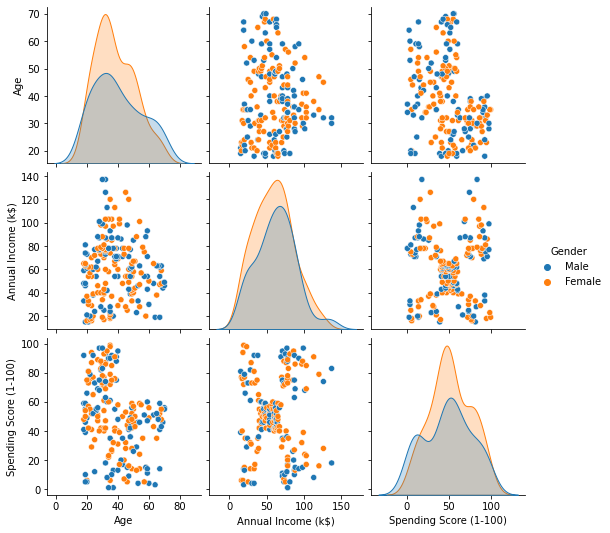

In [28]:
sns.pairplot(data=df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']], hue='Gender');

In [ ]:
# Onserve that Annual income and Spending score show some pattern.
# Other than the previously made observations, the above pairplot doesnt show any noticeable genderwise patterns

<AxesSubplot:>

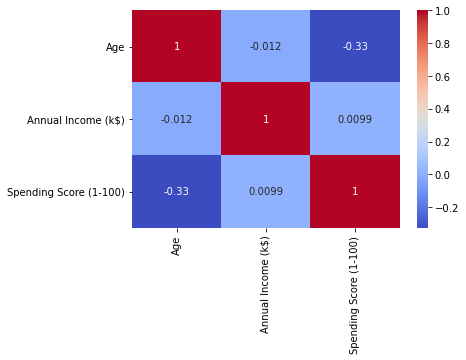

In [35]:
sns.heatmap(df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True, cmap='coolwarm')

In [ ]:
# The above heatmap indicates a weak or possibly no correlation between the variables.

# Bivariate Clustering

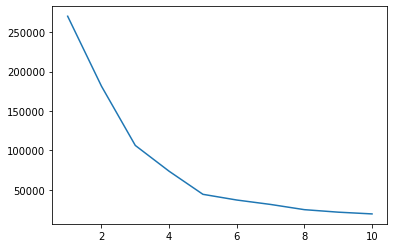

In [101]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_scores)

In [102]:
clustering_1=KMeans(n_clusters=5)
clustering_1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income cluster']=clustering_1.labels_


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

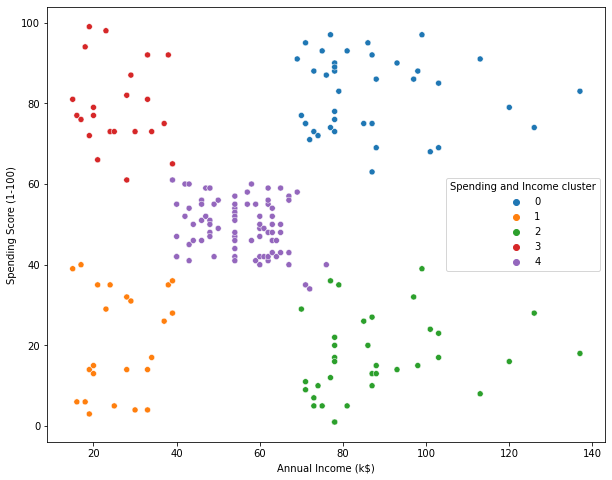

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income cluster', palette='tab10')

In [105]:
# Number of people in each cluster

df.groupby('Spending and Income cluster')['Age'].count()

Spending and Income cluster
0    39
1    23
2    35
3    22
4    81
Name: Age, dtype: int64

In [ ]:
# Cluster 2 is of interest since the people in the cluster are high earners but are low when it comes to spending

# Cluster 1 and 3 consist of people with low incomes, they may be more lured to spending more if offered discounts or sales promotions.

In [46]:
# Genderwise proportion of visitors in each cluster 

pd.crosstab(df['Spending and Income cluster'],df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [106]:
df.groupby('Spending and Income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,42.716049,55.296296,49.518519


In [107]:
dff=pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Spending and Income cluster,Gender_Male
0,19,15,39,1,1
1,21,15,81,3,1
2,20,16,6,1,0
3,23,16,77,3,0
4,31,17,40,1,0


In [108]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [109]:
dff=dff[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [110]:
scale=StandardScaler()
dff=pd.DataFrame(scale.fit_transform(dff))

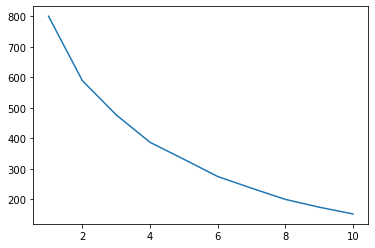

In [111]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(dff)
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

In [112]:
clustering_2=KMeans(n_clusters=4)
clustering_2.fit(dff)
dff['Multi cluster']=clustering_2.labels_

In [113]:
dff.columns

Index([0, 1, 2, 3, 'Multi cluster'], dtype='object')

In [114]:
import plotly.graph_objs as go
import plotly.io as pio

fig = go.Figure()

for i in range(4):
    fig.add_trace(go.Scatter3d(
        x=dff[dff['Multi cluster']==i][1],
        y=dff[dff['Multi cluster']==i][2],
        z=dff[dff['Multi cluster']==i][3],
        mode='markers',
        marker=dict(
            size=5,
            color=i,
            colorscale='Viridis',
            opacity=0.8
        ),
        name='Cluster '+str(i)
    ))

fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=800,
                  margin=dict(r=20, b=10, l=10, t=10))

pio.show(fig)

